In [1]:
#import required lib functions 
from __future__ import print_function
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import shutil
import pandas as pd
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import gzip,pickle,sys
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
#from keras import backend as K
from sklearn import metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


In [53]:
img_height=60
img_width=60
batch_size= 32
data_dir= "Training_set/Training"
df= pd.read_csv("Training_set/RFMiD_Training_Labels.csv", index_col='ID')
#print (df.head(5))
#y=df["Disease_Risk"]
#print(y)
col_list = df.columns[1:]


In [65]:
col_list = df.columns[:]
print(col_list)
#for index, row in df.iterrows():
    #print (index, " ", row)
for j, col in enumerate(col_list):
    print (j, ">>> ", col)

Index(['Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM',
       'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
       'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
       'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
       'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL'],
      dtype='object')
0 >>>  Disease_Risk
1 >>>  DR
2 >>>  ARMD
3 >>>  MH
4 >>>  DN
5 >>>  MYA
6 >>>  BRVO
7 >>>  TSLN
8 >>>  ERM
9 >>>  LS
10 >>>  MS
11 >>>  CSR
12 >>>  ODC
13 >>>  CRVO
14 >>>  TV
15 >>>  AH
16 >>>  ODP
17 >>>  ODE
18 >>>  ST
19 >>>  AION
20 >>>  PT
21 >>>  RT
22 >>>  RS
23 >>>  CRS
24 >>>  EDN
25 >>>  RPEC
26 >>>  MHL
27 >>>  RP
28 >>>  CWS
29 >>>  CB
30 >>>  ODPM
31 >>>  PRH
32 >>>  MNF
33 >>>  HR
34 >>>  CRAO
35 >>>  TD
36 >>>  CME
37 >>>  PTCR
38 >>>  CF
39 >>>  VH
40 >>>  MCA
41 >>>  VS
42 >>>  BRAO
43 >>>  PLQ
44 >>>  HPED
45 >>>  CL


In [29]:
path= "Training_set/Training"
data_dir= os.listdir(path)
print(data_dir)

['1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png', '1007.png', '1008.png', '1009.png', '101.png', '1010.png', '1011.png', '1012.png', '1013.png', '1014.png', '1015.png', '1016.png', '1017.png', '1018.png', '1019.png', '102.png', '1020.png', '1021.png', '1022.png', '1023.png', '1024.png', '1025.png', '1026.png', '1027.png', '1028.png', '1029.png', '103.png', '1030.png', '1031.png', '1032.png', '1033.png', '1034.png', '1035.png', '1036.png', '1037.png', '1038.png', '1039.png', '104.png', '1040.png', '1041.png', '1042.png', '1043.png', '1044.png', '1045.png', '1046.png', '1047.png', '1048.png', '1049.png', '105.png', '1050.png', '1051.png', '1052.png', '1053.png', '1054.png', '1055.png', '1056.png', '1057.png', '1058.png', '1059.png', '106.png', '1060.png', '1061.png', '1062.png', '1063.png', '1064.png', '1065.png', '1066.png', '1067.png', '1068.png', '1069.png', '107.png', '1070.png', '1071.png', '1072.png', '1073.png', '107

In [30]:
def get_data(path):
    data=[]
    data_dir= os.listdir(path)
    for img in data_dir:
        img_read= cv2.imread(os.path.join(path,img))
        img_res= cv2.re
        plt.imshow(img_read)
        break
    

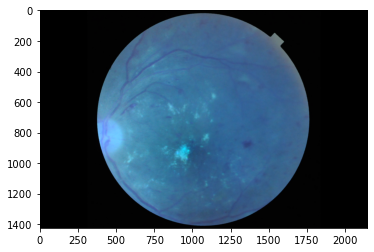

In [31]:
get_data(path)

In [49]:
def analyse_classes(dt):
    class_freq = dt.iloc[:, 1:].sum(axis=0).to_dict()
    print('Class Fre',class_freq)
    print("-------------------------------------------------------------------")
    n_diseased = (dt["Disease_Risk"] == 1).sum()
    
    print ('Disease Risk:', n_diseased)
    no_diseased = (dt["Disease_Risk"] == 0).sum()
    print ('No Risk:', no_diseased)
    for c in class_freq:
        print(c, class_freq[c], (class_freq[c] / n_diseased))
    #print(dt)
    labels_pairings = {}
    labels_pairings_ohe = {}
    col_list = dt.columns[1:]
    for index, row in dt.iterrows():
        pair = []
        for j, col in enumerate(col_list):
            if row[j+1] == 1 : pair.append(col)
        if not any(class_freq[c] < N_class for c in pair) : 
            continue
        key = "|".join(pair)
        if key in labels_pairings : labels_pairings[key].append(str(row["ID"]))
        else:
            labels_pairings[key] = [str(row["ID"])]
            labels_pairings_ohe[key] = row[1:].tolist()

    return dt, class_freq, labels_pairings, labels_pairings_ohe


In [61]:
dt, class_freq, labels_pairings, labels_pairings_ohe= analyse_classes(df)
print (class_freq, labels_pairings, labels_pairings_ohe)

Class Fre {'DR': 376, 'ARMD': 100, 'MH': 317, 'DN': 138, 'MYA': 101, 'BRVO': 73, 'TSLN': 186, 'ERM': 14, 'LS': 47, 'MS': 15, 'CSR': 37, 'ODC': 282, 'CRVO': 28, 'TV': 6, 'AH': 16, 'ODP': 65, 'ODE': 58, 'ST': 5, 'AION': 17, 'PT': 11, 'RT': 14, 'RS': 43, 'CRS': 32, 'EDN': 15, 'RPEC': 22, 'MHL': 11, 'RP': 6, 'CWS': 3, 'CB': 1, 'ODPM': 0, 'PRH': 2, 'MNF': 3, 'HR': 0, 'CRAO': 2, 'TD': 3, 'CME': 4, 'PTCR': 5, 'CF': 3, 'VH': 1, 'MCA': 1, 'VS': 1, 'BRAO': 2, 'PLQ': 1, 'HPED': 1, 'CL': 1}
-------------------------------------------------------------------
Disease Risk: 1519
No Risk: 401
DR 376 0.24753127057274524
ARMD 100 0.06583278472679395
MH 317 0.2086899275839368
DN 138 0.09084924292297564
MYA 101 0.06649111257406189
BRVO 73 0.04805793285055958
TSLN 186 0.12244897959183673
ERM 14 0.009216589861751152
LS 47 0.030941408821593155
MS 15 0.009874917709019092
CSR 37 0.024358130348913758
ODC 282 0.18564845292955892
CRVO 28 0.018433179723502304
TV 6 0.003949967083607637
AH 16 0.01053324555628703
ODP

TypeError: cannot unpack non-iterable NoneType object